# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [154]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
import seaborn
seaborn.set_context('talk')


In [155]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv(
    'https://raw.githubusercontent.com/bonafepedro/exploratory_analisis_datacuration/master/data/melbourne_and_airbnb.csv')
melb_df[:]

,Unnamed: 0,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,YearBuilt,CouncilArea,Regionname,Lattitude,Longtitude,BuildingArea,zipcode_int,airbnb_price_mean,airbnb_record_count
0,0,Abbotsford,2,h,1480000.0,2.5,3067.0,2.0,1.0,1.0,NaN,Yarra,Northern Metropolitan,-37.79960,144.99840,NaN,3067.0,130.624031,258.0
1,1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,1900.0,Yarra,Northern Metropolitan,-37.80790,144.99340,79.0,3067.0,130.624031,258.0
2,2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,1900.0,Yarra,Northern Metropolitan,-37.80930,144.99440,150.0,3067.0,130.624031,258.0
3,3,Abbotsford,3,h,850000.0,2.5,3067.0,3.0,2.0,1.0,NaN,Yarra,Northern Metropolitan,-37.79690,144.99690,NaN,3067.0,130.624031,258.0
4,4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,2014.0,Yarra,Northern Metropolitan,-37.80720,144.99410,142.0,3067.0,130.624031,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,13367,Wheelers Hill,4,h,1245000.0,16.7,3150.0,4.0,2.0,2.0,1981.0,NaN,South-Eastern Metropolitan,-37.90562,145.16761,NaN,3150.0,124.026455,189.0
13368,13368,Williamstown,3,h,1031000.0,6.8,3016.0,3.0,2.0,2.0,1995.0,NaN,Western Metropolitan,-37.85927,144.87904,133.0,3016.0,191.094595,74.0
13369,13369,Williamstown,3,h,1170000.0,6.8,3016.0,3.0,2.0,4.0,1997.0,NaN,Western Metropolitan,-37.85274,144.88738,NaN,3016.0,191.094595,74.0
13370,13370,Williamstown,4,h,2500000.0,6.8,3016.0,4.0,1.0,5.0,1920.0,NaN,Western Metropolitan,-37.85908,144.89299,157.0,3016.0,191.094595,74.0


In [156]:
melb_df.columns

Index(['Unnamed: 0', 'Suburb', 'Rooms', 'Type', 'Price', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'CouncilArea',
       'Regionname', 'Lattitude', 'Longtitude', 'BuildingArea', 'zipcode_int',
       'airbnb_price_mean', 'airbnb_record_count'],
      dtype='object')

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [157]:
columnas_object = melb_df.select_dtypes(include='object').columns
numerical_cols = melb_df.select_dtypes(include=['int64', 'float64']).columns

In [158]:
melb_df[columnas_object].nunique()

Suburb         314
Type             3
CouncilArea     33
Regionname       8
dtype: int64

In [159]:
# Check for nulls
melb_df[columnas_object].isna().sum()

Suburb            0
Type              0
CouncilArea    1348
Regionname        0
dtype: int64

Selecciono las columnas, excluyendo BuildingArea y YearBuilt como indica el ejercicio. 
¿CouncilArea tiene 1348 valores nulos y 33 opciones diferentes, que les parece excluirla también?

In [160]:
col_excluir = ['BuildingArea','YearBuilt']
melb_df1 = melb_df.loc[:, ~melb_df.columns.isin(col_excluir)].copy()
melb_df1

,Unnamed: 0,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Regionname,Lattitude,Longtitude,zipcode_int,airbnb_price_mean,airbnb_record_count
0,0,Abbotsford,2,h,1480000.0,2.5,3067.0,2.0,1.0,1.0,Yarra,Northern Metropolitan,-37.79960,144.99840,3067.0,130.624031,258.0
1,1,Abbotsford,2,h,1035000.0,2.5,3067.0,2.0,1.0,0.0,Yarra,Northern Metropolitan,-37.80790,144.99340,3067.0,130.624031,258.0
2,2,Abbotsford,3,h,1465000.0,2.5,3067.0,3.0,2.0,0.0,Yarra,Northern Metropolitan,-37.80930,144.99440,3067.0,130.624031,258.0
3,3,Abbotsford,3,h,850000.0,2.5,3067.0,3.0,2.0,1.0,Yarra,Northern Metropolitan,-37.79690,144.99690,3067.0,130.624031,258.0
4,4,Abbotsford,4,h,1600000.0,2.5,3067.0,3.0,1.0,2.0,Yarra,Northern Metropolitan,-37.80720,144.99410,3067.0,130.624031,258.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,13367,Wheelers Hill,4,h,1245000.0,16.7,3150.0,4.0,2.0,2.0,NaN,South-Eastern Metropolitan,-37.90562,145.16761,3150.0,124.026455,189.0
13368,13368,Williamstown,3,h,1031000.0,6.8,3016.0,3.0,2.0,2.0,NaN,Western Metropolitan,-37.85927,144.87904,3016.0,191.094595,74.0
13369,13369,Williamstown,3,h,1170000.0,6.8,3016.0,3.0,2.0,4.0,NaN,Western Metropolitan,-37.85274,144.88738,3016.0,191.094595,74.0
13370,13370,Williamstown,4,h,2500000.0,6.8,3016.0,4.0,1.0,5.0,NaN,Western Metropolitan,-37.85908,144.89299,3016.0,191.094595,74.0


Aplico el encoding

In [161]:
for columna in columnas_object:
    valores_distintos = melb_df1[columna].value_counts()
    print(f"Valores distintos en la columna {columna}:")
    print(valores_distintos)
    print()

Valores distintos en la columna Suburb:
Reservoir         359
Richmond          258
Bentleigh East    249
Preston           239
Brunswick         222
                 ... 
Sandhurst           1
Upwey               1
Bullengarook        1
Bacchus Marsh       1
Monbulk             1
Name: Suburb, Length: 314, dtype: int64

Valores distintos en la columna Type:
h    9244
u    3016
t    1112
Name: Type, dtype: int64

Valores distintos en la columna CouncilArea:
Moreland             1163
Boroondara           1079
Moonee Valley         996
Darebin               932
Glen Eira             848
Maribyrnong           692
Stonnington           679
Yarra                 640
Port Phillip          614
Banyule               592
Melbourne             466
Bayside               459
Hobsons Bay           432
Brimbank              424
Monash                331
Manningham            311
Whitehorse            302
Kingston              207
Whittlesea            167
Hume                  164
Wyndham           

Vemos que la columna suburb tiene 314 valores distintos por lo que procederemos para este análisis a no considerarla ya que incrementaría exponencialmente la cantidad de memoria utilizada. Si bien como vimos en clases se guardaría como una matriz esparsa luego para el uso de los modelos de imputación generaría complicaciones por la cantidad de memoria usada.

In [162]:
col_excluir = ['Suburb']
melb_df1 = melb_df1.loc[:, ~melb_df1.columns.isin(col_excluir)].copy()

In [163]:
melb_df1.columns

Index(['Unnamed: 0', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Lattitude',
       'Longtitude', 'zipcode_int', 'airbnb_price_mean',
       'airbnb_record_count'],
      dtype='object')

In [164]:
feature_cols = ['Type', 'CouncilArea', 'Regionname']
feature_dict = list(melb_df1[feature_cols].T.to_dict().values())
#feature_dict[:100]

In [165]:
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)


In [166]:
#feature_matrix
vec.get_feature_names_out()[:10] 

array(['CouncilArea', 'CouncilArea=Banyule', 'CouncilArea=Bayside',
       'CouncilArea=Boroondara', 'CouncilArea=Brimbank',
       'CouncilArea=Cardinia', 'CouncilArea=Casey', 'CouncilArea=Darebin',
       'CouncilArea=Frankston', 'CouncilArea=Glen Eira'], dtype=object)

In [167]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = numpy.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 2.30 MB
Final size: 2.30


Por haber eliminado la columna suburb el tamaño de la matriz densa tiene solo 2.3 MB, obviamente que estamos perdiendo información seguramente relevante, pero a fines prácticos entendemos que para este ejercicio la selección es correcta

In [168]:
dense_feature_matrix

matrix([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        ...,
        [nan,  0.,  0., ...,  1.,  0.,  0.],
        [nan,  0.,  0., ...,  1.,  0.,  0.],
        [nan,  0.,  0., ...,  1.,  0.,  0.]], dtype=float32)

Ahora codifico y me quedo con el df codificado

In [169]:
# Crea un subconjunto de datos solo con las columnas categóricas
df_categorico = melb_df1[feature_cols]

# Crea una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Realiza el encoding de las columnas categóricas
datos_codificados = encoder.fit_transform(df_categorico.values)

# Obtén los nombres de las columnas codificadas
nombres_columnas_codificadas = encoder.get_feature_names_out(feature_cols)

# Crea un nuevo DataFrame con las características codificadas
df_codificado = pd.DataFrame(datos_codificados, columns=nombres_columnas_codificadas)

#print(df_codificado)

C:\Users\agu_r\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [170]:
df_numerico= melb_df1.loc[:, melb_df1.columns.isin(numerical_cols)].copy()

In [171]:
melb_df1.columns

Index(['Unnamed: 0', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode',
       'Bedroom2', 'Bathroom', 'Car', 'CouncilArea', 'Regionname', 'Lattitude',
       'Longtitude', 'zipcode_int', 'airbnb_price_mean',
       'airbnb_record_count'],
      dtype='object')

In [172]:
df_final = pd.concat([df_numerico, df_codificado], axis=1)
df_final = df_final.drop(columns="Unnamed: 0")
df_final

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,zipcode_int,...,CouncilArea_Yarra Ranges,CouncilArea_nan,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,-37.79960,144.99840,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,-37.80790,144.99340,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,-37.80930,144.99440,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,-37.79690,144.99690,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,-37.80720,144.99410,3067.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,-37.90562,145.16761,3150.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13368,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,-37.85927,144.87904,3016.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13369,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,-37.85274,144.88738,3016.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13370,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,-37.85908,144.89299,3016.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [173]:
col_imputar = ['BuildingArea','YearBuilt']
df_imputar = melb_df.loc[:, melb_df.columns.isin(col_imputar)].copy()

df_final = pd.concat([df_final, df_imputar], axis=1)
df_final.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Lattitude', 'Longtitude', 'zipcode_int', 'airbnb_price_mean',
       'airbnb_record_count', 'Type_h', 'Type_t', 'Type_u',
       'CouncilArea_Banyule', 'CouncilArea_Bayside', 'CouncilArea_Boroondara',
       'CouncilArea_Brimbank', 'CouncilArea_Cardinia', 'CouncilArea_Casey',
       'CouncilArea_Darebin', 'CouncilArea_Frankston', 'CouncilArea_Glen Eira',
       'CouncilArea_Greater Dandenong', 'CouncilArea_Hobsons Bay',
       'CouncilArea_Hume', 'CouncilArea_Kingston', 'CouncilArea_Knox',
       'CouncilArea_Macedon Ranges', 'CouncilArea_Manningham',
       'CouncilArea_Maribyrnong', 'CouncilArea_Maroondah',
       'CouncilArea_Melbourne', 'CouncilArea_Melton', 'CouncilArea_Monash',
       'CouncilArea_Moonee Valley', 'CouncilArea_Moorabool',
       'CouncilArea_Moreland', 'CouncilArea_Nillumbik',
       'CouncilArea_Port Phillip', 'CouncilArea_Stonnington',
       'CouncilArea_Unavailable', 'Counc

In [174]:
df_final[col_imputar].isna().sum()

BuildingArea    6374
YearBuilt       5308
dtype: int64

In [175]:
df_final

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,zipcode_int,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt,BuildingArea
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,-37.79960,144.99840,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,-37.80790,144.99340,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,-37.80930,144.99440,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,-37.79690,144.99690,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,-37.80720,144.99410,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,-37.90562,145.16761,3150.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1981.0,NaN
13368,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,-37.85927,144.87904,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1995.0,133.0
13369,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,-37.85274,144.88738,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1997.0,NaN
13370,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,-37.85908,144.89299,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1920.0,157.0


In [176]:
# Imputamos las columnas con valores Nan

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = df_final.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

C:\Users\agu_r\miniconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [177]:
melb_data_mice

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,zipcode_int,...,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,YearBuilt,BuildingArea
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,-37.79960,144.99840,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1935.0,163.6
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,-37.80790,144.99340,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,-37.80930,144.99440,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,-37.79690,144.99690,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1935.0,163.6
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,-37.80720,144.99410,3067.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13367,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,-37.90562,145.16761,3150.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1981.0,162.8
13368,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,-37.85927,144.87904,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1995.0,133.0
13369,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,-37.85274,144.88738,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1997.0,182.6
13370,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,-37.85908,144.89299,3016.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1920.0,157.0


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [179]:
 # Observamos que quedaron algunas variables con valores Nan, al ser pocos valores realizamos una imputación por el valor mas frecuente
    
melb_data_mice.isna().sum()

Rooms                                     0
Price                                     0
Distance                                  0
Postcode                                  0
Bedroom2                                  0
Bathroom                                  0
Car                                      62
Lattitude                                 0
Longtitude                                0
zipcode_int                              20
airbnb_price_mean                        20
airbnb_record_count                      20
Type_h                                    0
Type_t                                    0
Type_u                                    0
CouncilArea_Banyule                       0
CouncilArea_Bayside                       0
CouncilArea_Boroondara                    0
CouncilArea_Brimbank                      0
CouncilArea_Cardinia                      0
CouncilArea_Casey                         0
CouncilArea_Darebin                       0
CouncilArea_Frankston           

In [180]:
# Imputamos


from sklearn.impute import SimpleImputer
data_most_frequent = melb_data_mice.copy()

#setting strategy to 'most_frequent' 

mean_imputer = SimpleImputer(strategy='most_frequent') # strategy can also be mean or median or most_frequent

data_most_frequent.iloc[:,:] = mean_imputer.fit_transform(data_most_frequent)

C:\Users\agu_r\AppData\Local\Temp\ipykernel_14440\1323232331.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_most_frequent.iloc[:,:] = mean_imputer.fit_transform(data_most_frequent)


In [181]:
melb_data_mice = data_most_frequent

In [182]:
# Observamos que ya no quedan Nan 
melb_data_mice.isna().sum()

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Lattitude                                0
Longtitude                               0
zipcode_int                              0
airbnb_price_mean                        0
airbnb_record_count                      0
Type_h                                   0
Type_t                                   0
Type_u                                   0
CouncilArea_Banyule                      0
CouncilArea_Bayside                      0
CouncilArea_Boroondara                   0
CouncilArea_Brimbank                     0
CouncilArea_Cardinia                     0
CouncilArea_Casey                        0
CouncilArea_Darebin                      0
CouncilArea_Frankston                    0
CouncilArea

In [183]:
# Dropeamos la variable target, en nuestro caso la columna precio
X = melb_data_mice.drop(columns="Price")

Decidimos *estandarizar* el dataframe original para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande.

In [184]:
# Normalizamos 
X_standard2 = ((X - X.mean(axis=0)) / X.std(axis=0))

In [185]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_standard2)
print("Principal components")
print(pca2.components_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[ 0.16737992  0.27253587  0.36951406  0.16832335  0.15356459  0.11875642
  -0.26477546  0.30918167  0.36976132  0.09016116 -0.08948561  0.07542722
  -0.00331658 -0.08118006  0.00628831  0.09824772  0.06411523 -0.07459069
   0.077369    0.14047742 -0.07107446  0.100362    0.10396938  0.05867964
  -0.06647719 -0.02262979  0.09514622  0.05786694  0.01223264  0.05266352
  -0.11376396  0.04273174 -0.09299753  0.00943562  0.08397084 -0.11777646
   0.00160107 -0.11489236  0.01553288  0.02896014  0.02833712  0.00451147
   0.05447014  0.02288249 -0.02691273 -0.07875972  0.06288974  0.07012964
   0.1049369   0.14559726 -0.1929464   0.04375195  0.18889021  0.19868184
  -0.20708868  0.02133845  0.00861131  0.02885461]
 [ 0.34720816  0.19872501 -0.13372745  0.34243141  0.18643527  0.21547499
   0.17867797 -0.08966191 -0.13891911 -0.15497793 -0.22841118  0.32101504
  -0.0302656  -0.33482879  0.0580313  -0.05550066 -0.06371158  0.09870163
  -0.00779397 -0.01543399  0.00459329  0

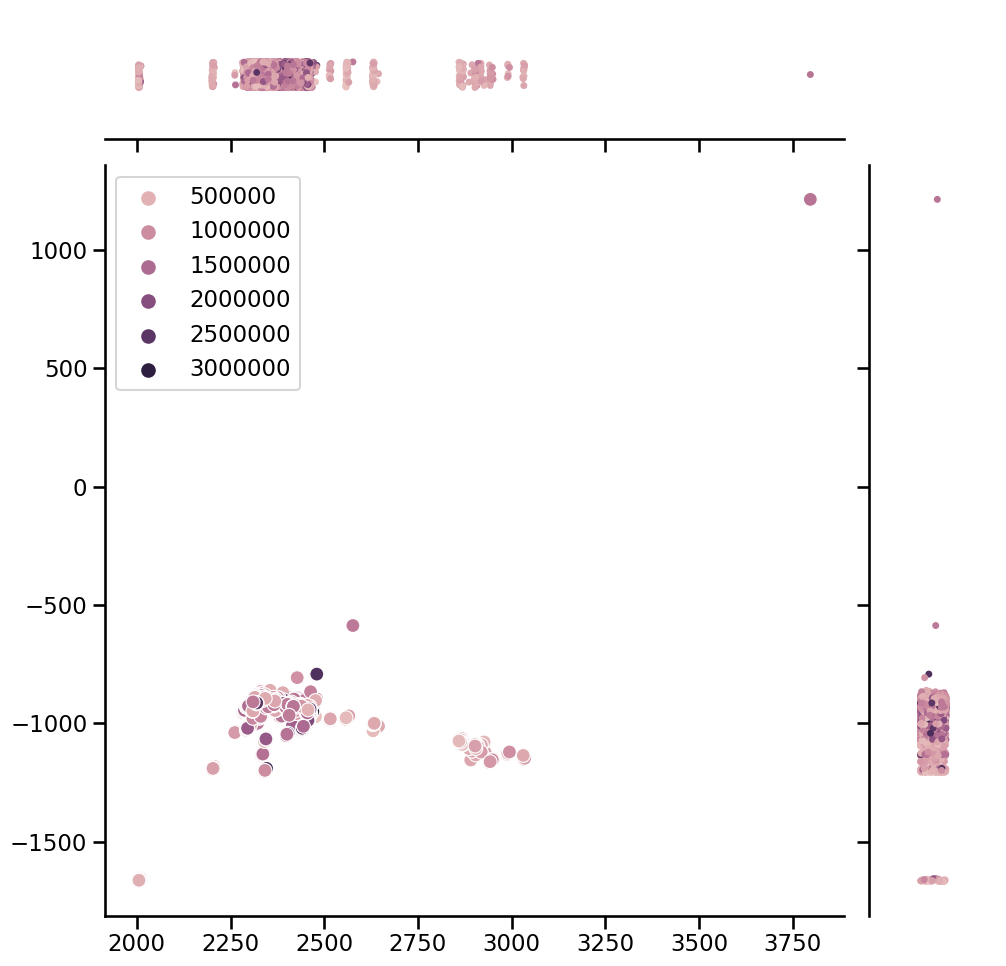

In [186]:
X_reduced = pca2.transform(X)
g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue=melb_data_mice.Price.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

In [187]:
# Otra alternativa seria realizar un MinMaxScaler


from sklearn.decomposition import PCA
#Entendemos que es necesario escalar y estandarizar los datos, por lo que procedemos a aplicar MinMaxScaler para las columnas numericas.
scaler = MinMaxScaler()
#numerical_cols = melb_data_mice.select_dtypes(include=['int64', 'float64']).columns
# Escala las características numéricas
melb_data_mice_scaled = pd.DataFrame(scaler.fit_transform(melb_data_mice), columns=melb_data_mice.columns)









In [189]:
melb_data_mice_scaled = melb_data_mice_scaled.drop(columns= "Price")

In [192]:
pca2 = PCA(n_components=5)
pca2.fit(melb_data_mice_scaled)
print("Principal components")
print(pca2.components_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[-6.31647729e-02 -3.73655821e-02  4.73696395e-02 -2.77821274e-02
  -1.08232168e-02 -2.79496305e-02 -7.23248367e-02  3.54388930e-02
   4.77074202e-02  3.56195183e-02  2.87343517e-02 -5.19136268e-01
   6.72443951e-02  4.51891873e-01 -2.83027173e-02  4.88364555e-02
   1.28653182e-01 -3.68875763e-02 -1.83037626e-04 -1.73123308e-03
  -6.80028173e-02 -2.07363542e-03  1.07052713e-01 -1.85108408e-03
  -2.74008314e-02 -1.55504686e-02  5.49245199e-03 -3.71510808e-03
  -4.60568740e-04 -1.50416500e-02 -4.01336156e-02 -3.26282153e-03
   2.07000752e-02 -4.89053665e-03  1.13195529e-02 -6.07030326e-02
  -6.23546434e-05 -9.35089455e-02 -2.29614478e-03  9.65176734e-02
   1.06325219e-01  4.31500100e-05  5.40966019e-03 -1.48124651e-02
  -7.47429022e-03 -2.81013819e-02 -9.66462465e-04 -7.29373531e-02
  -6.26336706e-02 -2.14625539e-03 -2.61240727e-01 -2.67271607e-03
  -1.77068484e-02  5.53814518e-01 -2.05379135e-01 -2.03516592e-03
   9.65559725e-03 -4.73379253e-04]
 [-6.84038643e-02 -5

Obseravando que a partir del cuarto componente ya no es significativo nos quedamos solo con las primeras tres

In [193]:
pca2 = PCA(n_components=3)
pca2.fit(melb_data_mice_scaled)
print("Principal components")
print(pca2.components_)
print("Explained variance ratio")
print(pca2.explained_variance_ratio_)

Principal components
[[-6.31647717e-02 -3.73655702e-02  4.73696452e-02 -2.77821269e-02
  -1.08232168e-02 -2.79496294e-02 -7.23248444e-02  3.54388940e-02
   4.77074259e-02  3.56195138e-02  2.87343499e-02 -5.19136270e-01
   6.72443926e-02  4.51891877e-01 -2.83027138e-02  4.88364514e-02
   1.28653191e-01 -3.68875670e-02 -1.83037341e-04 -1.73123108e-03
  -6.80028306e-02 -2.07363251e-03  1.07052740e-01 -1.85108145e-03
  -2.74008197e-02 -1.55504674e-02  5.49245958e-03 -3.71510777e-03
  -4.60568617e-04 -1.50416554e-02 -4.01336365e-02 -3.26282181e-03
   2.07000773e-02 -4.89053576e-03  1.13195572e-02 -6.07030355e-02
  -6.23546274e-05 -9.35089476e-02 -2.29614491e-03  9.65176925e-02
   1.06325162e-01  4.31500070e-05  5.40965681e-03 -1.48124634e-02
  -7.47428940e-03 -2.81013730e-02 -9.66462120e-04 -7.29373601e-02
  -6.26336808e-02 -2.14625402e-03 -2.61240729e-01 -2.67271549e-03
  -1.77068261e-02  5.53814508e-01 -2.05379137e-01 -2.03516539e-03
   9.65559822e-03 -4.73379241e-04]
 [-6.84038645e-02 -5

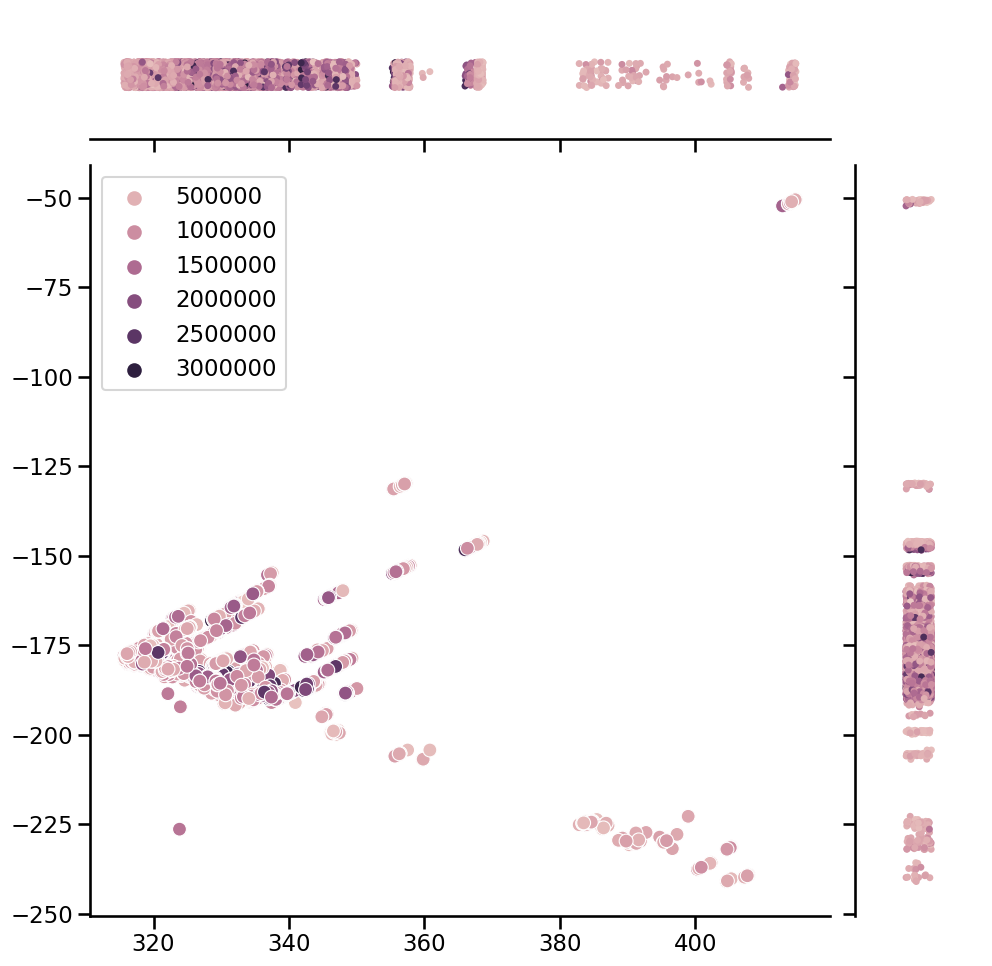

In [194]:
X_reduced = pca2.transform(X)
g = seaborn.JointGrid(x=X_reduced[:,0], y=X_reduced[:,1],
                      hue=melb_data_mice.Price.values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria']
Matrix has shape (13580, 11), with columns: ['Type=h', 'Type=t', 'Type=u', 'Regionname=Eastern Metropolitan', 'Regionname=Eastern Victoria', 'Regionname=Northern Metropolitan', 'Regionname=Northern Victoria', 'Regionname=South-Eastern Metropolitan', 'Regionname=Southern Metropolitan', 'Regionname=Western Metropolitan', 'Regionname=Western Victoria', 'Rooms', 'Distance']


,Type=h,Type=t,Type=u,Regionname=Eastern Metropolitan,Regionname=Eastern Victoria,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Regionname=Western Victoria,Rooms,Distance,pca1,pca2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.5,-7.669418,-0.292703
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,-7.620201,0.619633
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,2.5,-7.570984,1.531969


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
